# MMI 701: Multimedia Signal Processing
## Frequency-domain analysis of signals (Pt 2)

- In addition to what we used during the past two weeks we will use the ```sympy``` library for dealing with the continuous-time signals

In [1]:
import numpy as np
import scipy.signal as sgn
import sympy as sp
import matplotlib.pyplot as plt

### Discrete-time Fourier Transform

- We can use a numerical implementation for the DTFT, but we will again have to use symbolic math for IDTFT
- We will use the discrete-time signal that we discussed in the lecture video. For that we will first define the ```rect```signal. We will then use two rect signals to construct our signal. We will use that signal to calculate the DTFT of the signal. 

In [2]:
def delay(sigfun, n, offset, *args): # sigfun is a function to generate a discrete-time signal, *args are remaining arguments to be passed on to the function
    d = n - offset
    return sigfun(d, *args)

def step(n):
    if n >=0:
        return 1
    return 0

def rect(n, N):
    s1 = delay(step, n, 0)
    s2 = delay(step, n, N)
    return s1-s2

- We will now define a ```lambda``` function for our signal. This is something I rarely use myself despite being a very useful way to code less important and shorted functions.
- What is a lambda function?: https://realpython.com/python-lambda/

In [3]:
sig = lambda n, N1, N2, A1, A2, offset1, offset2 :  A1 * delay(rect, n, offset1, N1) + A2 * delay(rect, n, offset2, N2)

In [4]:
sg = []
for n in range(-10,10):
    sg.append(sig(n, 4, 3, 1, 0.5, 0, 4))
sg = np.array(sg)

<StemContainer object of 3 artists>

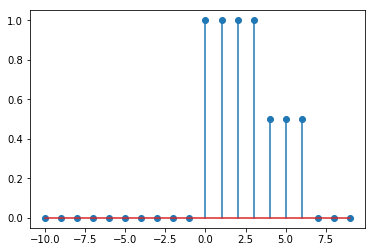

In [5]:
plt.stem(np.arange(-10,10), sg)

- DTFT is an infinite series, but our DT signal has finite time support. This means that we only need to use the samples for which the signal is non-zero
- We will again have to use ```sympy```since the frequency variable $\omega$ is a continuous variable

In [6]:
omega = sp.symbols('omega')
def dtft(sigfun, nmin, nmax, *args):
    X = 0
    for n in range(nmin, nmax + 1):
        X += sigfun(n, *args) * sp.exp(-sp.I * omega * n)
    return X

In [7]:
X = dtft(sig, 0, 7, 4, 3, 1, 0.5, 0, 4) # nmin =0, nmax = 7, all the rest of the inputs are arguments to be passed on to sig

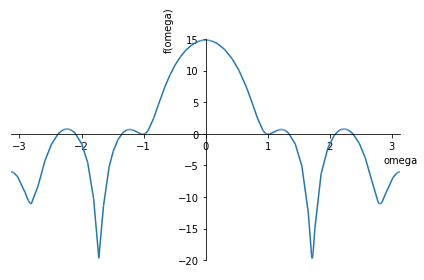

In [8]:
sp.plot(20*sp.log(abs(X),10), (omega, -sp.pi, sp.pi)) # Plot the magnitude spectrum (in dB)

### Gibbs' Phenomenon

- We will now show the effects of the truncation length on DTFT.

In [9]:
def idtft(X, omega):
    xn = sp.integrate(X, (omega, -sp.pi, sp.pi))
    return xn

In [10]:
X = sp.Piecewise((1, (abs(omega)<sp.pi/2)), (0, True))

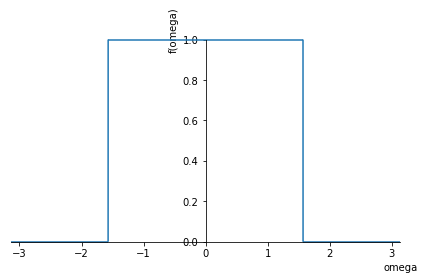

In [11]:
sp.plot(X, (omega, -sp.pi, sp.pi))

In [12]:
ns = sp.symbols('ns')

def idtft(X):
    xn = (1/(2*np.pi))*sp.integrate(X * sp.exp(sp.I * omega * ns), (omega, -sp.pi, sp.pi))
    fn = sp.lambdify(ns, xn)
    return fn

In [13]:
fn = idtft(X)

<string>:2: RuntimeWarning: divide by zero encountered in cdouble_scalars
<string>:2: RuntimeWarning: invalid value encountered in cdouble_scalars


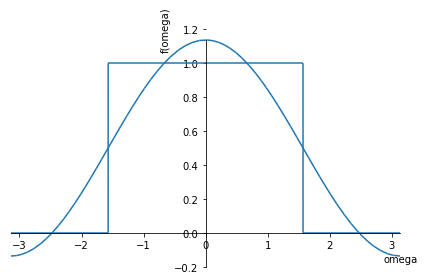

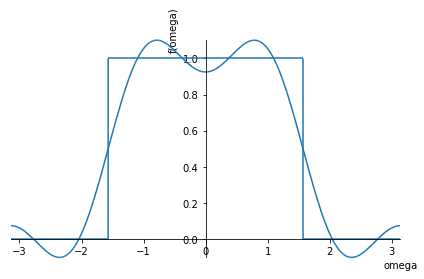

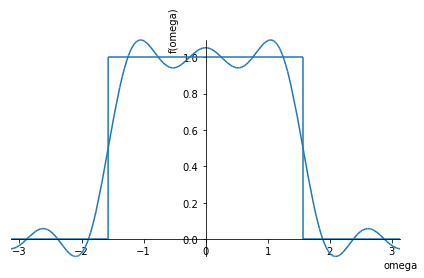

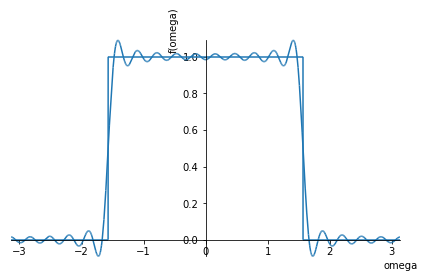

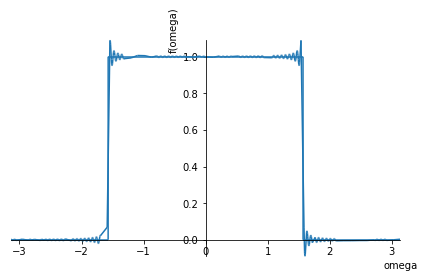

In [14]:
Xg = dtft(fn, -1, 1)
p1 = sp.plot(Xg, X, (omega, -sp.pi, sp.pi))
Xg = dtft(fn, -3, 3)
p2 = sp.plot(Xg, X, (omega, -sp.pi, sp.pi))
Xg = dtft(fn, -5, 5)
p3 = sp.plot(Xg, X, (omega, -sp.pi, sp.pi))
Xg = dtft(fn, -20, 20)
p3 = sp.plot(Xg, X, (omega, -sp.pi, sp.pi))
Xg = dtft(fn, -100, 100)
p3 = sp.plot(Xg, X, (omega, -sp.pi, sp.pi))

- DTFT tries its best to approximate the edges of the signal but the overshoot remains.

#### © 2020, Huseyin Hacihabiboglu, (hhuseyin@metu.edu.tr), METU Graduate School of Informatics